In [2]:
import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#define assets
assets = ['EURUSD' ,'USDCHF' ,'GBPUSD' ,'USDCAD' ,'BTCUSD' ,'ETHUSD' ,'XAUUSD' ,'XAUSD' ,'SP500m','UK100']
frame15 = mt5.TIMEFRAME_M15
frame30 = mt5.TIMEFRAME_M30
frame1h = mt5.TIMEFRAME_H1
frame_d1 = mt5.TIMEFRAME_D1

timezone = pytz.timezone("Europe/Paris")
time_from = datetime.datetime(2013,6,24,tzinfo=timezone)
time_to = datetime.datetime(2024,6,24,tzinfo=timezone)

def get_assetsquotes(time_frame,year,month,day,asset):
    if not mt5.initialize():
        print("Initialize failed error code =",mt5.last_error())
        quit()
    timezone = pytz.timezone("Europe/Paris")
    time_from = datetime.datetime(year,month,day,tzinfo=timezone)
    time_to = datetime.datetime(2024,6,24,tzinfo=timezone)
    #time_to = datetime.datetime.now(timezone)+datetime.timedelta(days=1)
    rates = mt5.copy_rates_range(asset, time_frame, time_from,time_to)
    rates_frame = pd.DataFrame(rates)
    return rates_frame

def mass_import(asset,time_frame):
    if time_frame == 'H1':
        data = get_assetsquotes(frame1h,2013,2,2,assets[asset])
        data.iloc[:, 1:5].values
        data.round(decimals = 5)

    if time_frame == 'D1':
        data = get_assetsquotes(frame_d1,2000,1,1,asset = assets[asset])
        data.iloc[:, 1:5].values
        data.round(decimals = 5)
    return data

def delete_column(data, index, times):
    for i in range(1, times + 1):
        data = np.delete(data, index, axis = 1)
    return data

def add_column(data,times):
    for i in range(1,times+1):
        new = np.zeros((len(data),1),dtype=float)
        data = np.append(data,new,axis=1)
    return data

def ohlc_plot_bars(Data, window):
     
    Chosen = Data[-window:, ]
    
    for i in range(len(Chosen)):
        
        plt.vlines(x = i, ymin = Chosen[i, 2], ymax = Chosen[i, 1], color = 'black', linewidth = 1)  
        plt.vlines(x = i, ymin = Chosen[i, 2], ymax = Chosen[i, 1], color = 'black', linewidth = 1)
        
        if Chosen[i, 3] > Chosen[i, 0]:
            plt.vlines(x = i, ymin = Chosen[i, 0], ymax = Chosen[i, 3], color = 'black', linewidth = 1.00)  

        if Chosen[i, 3] < Chosen[i, 0]:
            plt.vlines(x = i, ymin = Chosen[i, 3], ymax = Chosen[i, 0], color = 'black', linewidth = 1.00)  
            
        if Chosen[i, 3] == Chosen[i, 0]:
            plt.vlines(x = i, ymin = Chosen[i, 3], ymax = Chosen[i, 0], color = 'black', linewidth = 1.00)  
            
    plt.grid() 


  
def jump(Data, jump):
    
    Data = Data[jump:, ]
    
    return Data

def ma(Data,lookback,close,where):
    Data = add_column(Data,1)

    for i in range(len(Data)):
        try:
            Data[i,where] = (Data[i-lookback+1:i+1,close].mean())

        except IndexError:
            pass
    
    Data = jump(Data,lookback)

    return Data

def ema(Data,alpha,lookback,what,where):
    alpha = alpha/(lookback+1)
    beta = 1 - alpha

    Data = ma(Data,lookback,what,where)

    Data[lookback+1,where] = (Data[lookback+1,what]*alpha)+(Data[lookback,where]*beta)

    for i in range(lookback+2,len(Data)):
        try:
            Data[i,where] = (Data[i,what]*alpha) + (Data[i-1,where]*beta)

        except IndexError:
            pass

    return Data

def fma(Data,where):
    Data = add_column(Data,2)
    Data = ema(Data,2,5,1,where)
    Data = ema(Data,2,5,1,where+1)
    Data = ema(Data,2,5,1,where+2)
    Data = ema(Data,2,5,1,where+3)
    Data = ema(Data,2,5,1,where+4)
    Data = ema(Data,2,5,1,where+5)
    Data = ema(Data,2,5,1,where+6)
    Data = ema(Data,2,5,1,where+7)
    Data = ema(Data,2,5,1,where+8)
    Data = ema(Data,2,5,1,where+9)
    Data = ema(Data,2,5,1,where+10)
    Data = ema(Data,2,5,1,where+11)
    Data = ema(Data,2,5,1,where+12)
    Data = ema(Data,2,5,1,where+13)
    Data = ema(Data,2,5,1,where+14)

    Data[:,where+15] = (Data[:,where]+
                        Data[:,where+1]+
                        Data[:,where+2]+
                        Data[:,where+3]+
                        Data[:,where+4]+
                        Data[:,where+5]+
                        Data[:,where+6]+
                        Data[:,where+7]+
                        Data[:,where+8]+
                        Data[:,where+9]+
                        Data[:,where+10]+
                        Data[:,where+11]+
                        Data[:,where+12]+
                        Data[:,where+13]+
                        Data[:,where+14])/15
     
    Data = delete_column(Data,where,15)
    # Calculating Different Moving Averages
    Data = ema(Data, 2, 5,    2, where + 1)    
    Data = ema(Data, 2, 8,    2, where + 2)    
    Data = ema(Data, 2, 13,   2, where + 3)    
    Data = ema(Data, 2, 21,   2, where + 4)    
    Data = ema(Data, 2, 34,   2, where + 5)    
    Data = ema(Data, 2, 55,   2, where + 6)    
    Data = ema(Data, 2, 89,   2, where + 7)    
    Data = ema(Data, 2, 144,  2, where + 8)    
    Data = ema(Data, 2, 233,  2, where + 9)    
    Data = ema(Data, 2, 377,  2, where + 10)    
    Data = ema(Data, 2, 610,  2, where + 11)    
    Data = ema(Data, 2, 987,  2, where + 12)    
    Data = ema(Data, 2, 1597, 2, where + 13) 
    Data = ema(Data, 2, 2584, 2, where + 14) 
    Data = ema(Data, 2, 4181, 2, where + 15) 

    # Calculating the High FMA
    Data[:, where + 16] = (Data[:, where + 1]  + \
                          Data[:,  where + 2]  + \
                          Data[:,  where + 3]  + \
                          Data[:,  where + 4]  + \
                          Data[:,  where + 5]  + \
                          Data[:,  where + 6]  + \
                          Data[:,  where + 7]  + \
                          Data[:,  where + 8]  + \
                          Data[:,  where + 9]  + \
                          Data[:,  where + 10] + \
                          Data[:,  where + 11] + \
                          Data[:,  where + 12] + \
                          Data[:,  where + 13] + \
                          Data[:,  where + 14] + \
                          Data[:,  where + 15]) / 15
   
    Data = delete_column(Data, where + 1, 15)

    return Data


In [4]:

df = mass_import(0,'H1')
my_data1 = delete_column(df, 5, 3)
my_data1 = delete_column(my_data1,0,1)    

In [5]:
x=fma(my_data1,4)

C:\Users\hp\AppData\Local\Temp\ipykernel_30596\3986021817.py:80: RuntimeWarning: Mean of empty slice.
  Data[i,where] = (Data[i-lookback+1:i+1,close].mean())
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


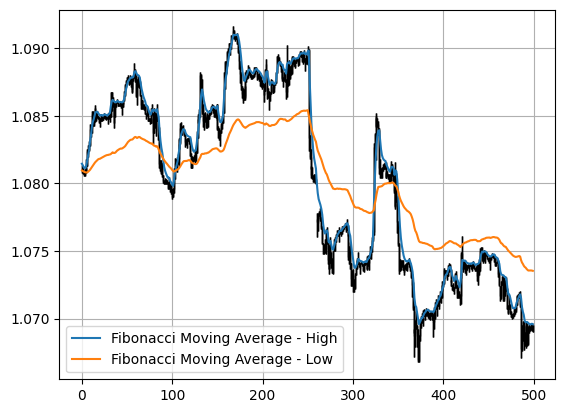

In [13]:
ohlc_plot_bars(my_data1,500)
plt.plot(x[-500:, 4], label = 'Fibonacci Moving Average - High')
plt.plot(x[-500:, 5], label = 'Fibonacci Moving Average - Low')
plt.legend()